In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df= pd.read_csv(r'C:\Users\Armado\Documents\GitProjects\EDA_Proyecto\data\raw\timeforcasting.csv')
df

,User ID,Order Id,Product Id,Price,Time
0,6365,10147,7575.0,175.0,2019-03-22T00:20:26+00:00
1,1,10148,7575.0,175.0,2019-03-22T00:20:26+00:00
2,0,10146,5633.0,4.5,2019-03-20T12:42:18+00:00
3,6290,10144,7574.0,175.0,2019-03-19T19:47:17+00:00
4,1,10145,5593.0,3.5,2019-03-19T19:47:17+00:00
...,...,...,...,...,...
1508,0,6067,NaN,20.0,2014-02-13T23:43:19+00:00
1509,0,6066,NaN,20.0,2014-02-13T21:04:30+00:00
1510,0,6065,NaN,20.0,2014-02-13T20:27:19+00:00
1511,5196,6064,NaN,20.0,2014-02-13T00:35:55+00:00


#Notas relativas al dataset:
Un User ID aparece multiples veces con diferentes Product ID con diferentes valores de Time,  esto sugiere que un usuario crea una orden de pedido, dento de la orden se recogen los diferentes productos. La Fecha y hora de la operación parece estar asignada poer orden.

In [36]:
''' Descriptivos'''
#a contiinuación se generan los descriptivos de las variables del dataset
df.describe(include='all')

,User ID,Order Id,Product Id,Price,Time
count,1513.000000,1513.000000,1460.000000,1513.000000,1513
unique,NaN,NaN,NaN,NaN,1499
top,NaN,NaN,NaN,NaN,2019-03-05T18:23:02+00:00
freq,NaN,NaN,NaN,NaN,2
mean,3108.943159,6844.588896,118.500000,112.688420,NaN
std,2520.000520,542.457749,888.892554,175.592896,NaN
min,0.000000,6064.000000,0.000000,0.000000,NaN
25%,0.000000,6441.000000,0.000000,12.000000,NaN
50%,3941.000000,6819.000000,0.000000,25.000000,NaN
75%,5311.000000,7197.000000,0.000000,144.000000,NaN


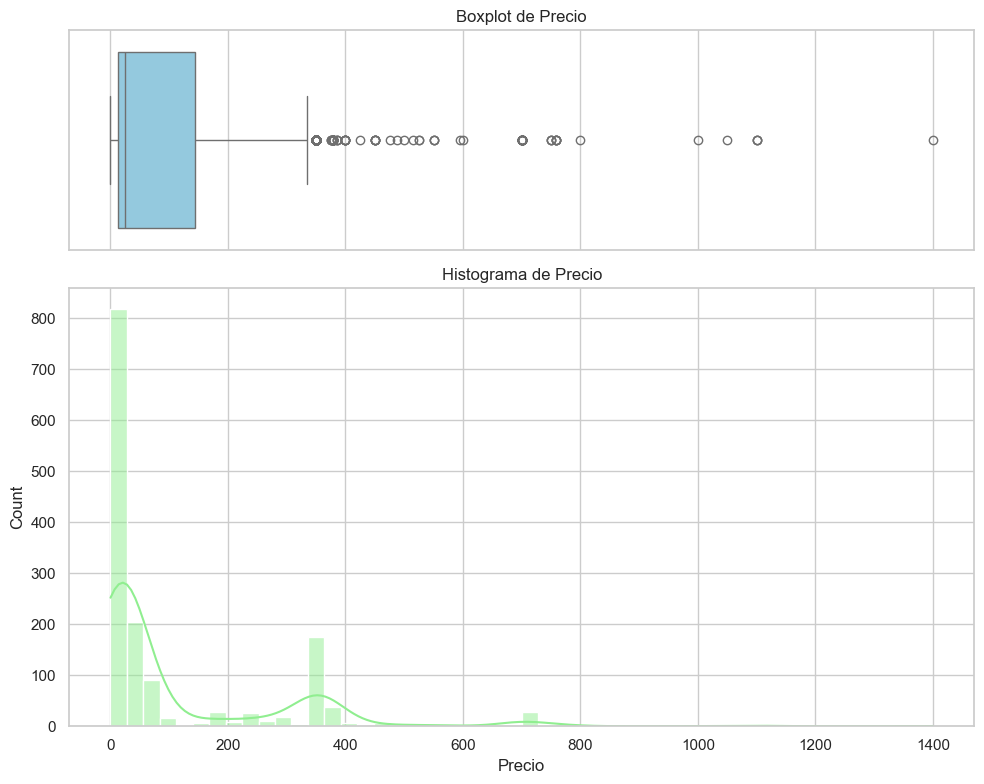

In [37]:

# Estilo visual
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2]})
# Boxplot
sns.boxplot(x=df['Price'], ax=axes[0], color='skyblue')
axes[0].set(title='Boxplot de Precio')
# Histograma
sns.histplot(x=df['Price'], ax=axes[1], bins=50, kde=True, color='lightgreen')
axes[1].set(title='Histograma de Precio', xlabel='Precio')
plt.tight_layout()
plt.show()

#Comentarios del descriptivo
 - Se puede observar que hay ciertos elementos de la columna User ID==0, esto se puede deber a datos faltantes, posiblemente por errores de sistema o de registro,  a veces tambien se usa un usuario neutro para hacer test de ordenes u opciones similares,  algo parecido pasa con el  user ID ==1.

 - Solo se tienen 1460 registrso validos para Product Id,  por lo que hay 53 valores faltantes.

 - La disperción de los datos es alta para la variable Price, hay demasiados productos con precio 0, la mayoría son menores de 400 pesos, pero el máximo es de 1400
- Adcionalmente hay 52 ordenes de producto distintas pero sin un producto asociado, aunque si tienen precio, la mayoría de estas ordenes pertenecen a Usuarios tipo 0.






In [40]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = df['Time'].dt.tz_localize(None)
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df.head(5)

,User ID,Order Id,Product Id,Price,Time,year,month
0,6365,10147,7575.0,175.0,2019-03-22 00:20:26,2019,3
1,1,10148,7575.0,175.0,2019-03-22 00:20:26,2019,3
2,0,10146,5633.0,4.5,2019-03-20 12:42:18,2019,3
3,6290,10144,7574.0,175.0,2019-03-19 19:47:17,2019,3
4,1,10145,5593.0,3.5,2019-03-19 19:47:17,2019,3


In [41]:
df[df['User ID'].isin([0, 1])]

,User ID,Order Id,Product Id,Price,Time,year,month
1,1,10148,7575.0,175.0,2019-03-22 00:20:26,2019,3
2,0,10146,5633.0,4.5,2019-03-20 12:42:18,2019,3
4,1,10145,5593.0,3.5,2019-03-19 19:47:17,2019,3
6,1,10143,7574.0,175.0,2019-03-19 19:39:57,2019,3
8,1,10141,7575.0,175.0,2019-03-06 23:20:42,2019,3
...,...,...,...,...,...,...,...
1506,0,6069,NaN,20.0,2014-02-14 17:51:38,2014,2
1507,0,6068,NaN,20.0,2014-02-14 15:42:10,2014,2
1508,0,6067,NaN,20.0,2014-02-13 23:43:19,2014,2
1509,0,6066,NaN,20.0,2014-02-13 21:04:30,2014,2


# Mantenmos usuarios 0 o 1?
Se percibe que la cantidad de registros que pertenecen a usuarios 0 o 1 son aprox la tercera parte del total (37%) por lo que es importante estar seguros de que al quitarlos no se perderá una parte importante de los datos.

    - Veamos si tiene un Producto ID valido, buscando la proporción de esos registros que  tiene un Product Id.
    - Tabien se busca saber si existe un precio para esos registros.
    - Revisamos si tienen fechas validas
    - Verificamos las ordenes distintas para esos registros
    


In [47]:
print(df[df['User ID'].isin([0, 1])]['Product Id'].notna().mean())
print(df[(df['User ID'].isin([0, 1])) & (df['Price'] > 0)])
print(df[df['User ID'].isin([0, 1])]['Time'].dt.date.value_counts())
print(df[df['User ID'].isin([0, 1])]['Order Id'].nunique())


0.9203539823008849
      User ID  Order Id  Product Id  Price                Time  year  month
1           1     10148      7575.0  175.0 2019-03-22 00:20:26  2019      3
2           0     10146      5633.0    4.5 2019-03-20 12:42:18  2019      3
4           1     10145      5593.0    3.5 2019-03-19 19:47:17  2019      3
6           1     10143      7574.0  175.0 2019-03-19 19:39:57  2019      3
8           1     10141      7575.0  175.0 2019-03-06 23:20:42  2019      3
...       ...       ...         ...    ...                 ...   ...    ...
1506        0      6069         NaN   20.0 2014-02-14 17:51:38  2014      2
1507        0      6068         NaN   20.0 2014-02-14 15:42:10  2014      2
1508        0      6067         NaN   20.0 2014-02-13 23:43:19  2014      2
1509        0      6066         NaN   20.0 2014-02-13 21:04:30  2014      2
1510        0      6065         NaN   20.0 2014-02-13 20:27:19  2014      2

[565 rows x 7 columns]
Time
2014-02-14    8
2019-02-25    7
2016-07-

# Limpieza del dataset

